This splitting idea can be formulated as time dependent
Russian rouletting the the time varying term. <br>

To get high order convergence instead using a fixed time grid for the local approx
use a Poisson time proces such that splitting into the local approx can be fully
formulated with Poisson time processes.

# Idea
Want to solve:
$$
y'= A(t) y + f(t)
.
$$ 
Know that $A$ and $f$ are approx constant then use following estimators in 
solver:

\begin{align*}
A(t) &\cong I_{1}(t) A(t_{k}) + I_{2}(t) (A(t) - A(t_{k})) \\    
f(t) &\cong I_{1}(t) f(t_{k}) + I_{2}(t) (f(t) - f(t_{k}))
\end{align*}
with $E[I_{1}(t)] = E[I_{2}(t)] = 1$, $I_{1} = 0 \implies I_{2} =0$ 
and also in reverse, 
$I_{2}(t) =0$ are places where the ODE reduces to 
a constant solve and for $I_{1}(t)=0$ an unbiased method should 
be used, $I_{1}(t), I_{2}(2)$ should change from $0->1$ and $1->0$,
roughly once over time interval $h$ as $A(t)$ is approx constant
$A(t)-A(t_{k})$ for $t \in [t_{k}, t_{k}+h]$ should be small 
and sampled accordanly to their magnitude.


# sampling the time process
Here I just simulate the time process separately.

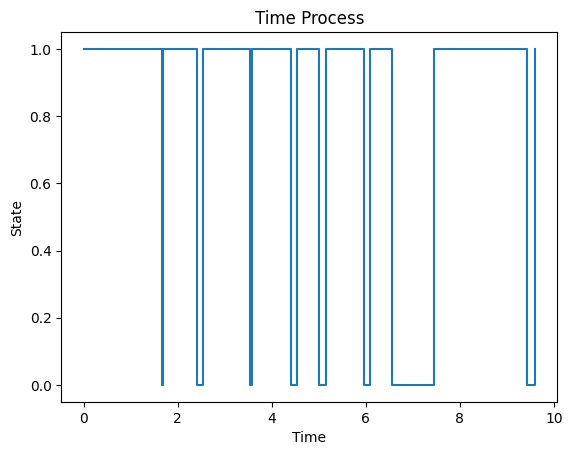

0.8250892094624588 analytic= 0.8333333333333333


In [655]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def time_process(h,lam,t_end):
    if random()<1-lam*h/(lam*h+1):
        tt=[(0,1)]
        tnew = tt[-1][0] + np.random.exponential(lam*h**2)
        tt.append((tnew,1))
    else:
        tt=[(0,1)]
    while True:
        tnew = tt[-1][0] + np.random.exponential(h)
        if tnew>t_end: return tt
        tt.append((tnew,0))
        tnew = tt[-1][0] + np.random.exponential(lam*h**2)
        if tnew>t_end: return tt
        tt.append((tnew,1))

# Generate the time process
h = 1
lam = 0.2
t_end = 10
tt = time_process(h,lam, t_end)

# Separate the time points and states
times, states = zip(*tt)

# Plot the time process
plt.step(times, states, where='post')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Time Process')
plt.show()

durations = np.diff(times)
# Calculate the time-weighted average
time_weighted_average = np.sum(states[:-1] * durations) / np.sum(durations)
print(time_weighted_average, "analytic=",1-lam*h/(1+lam*h))

# test the splitting with analytical subsolutions
for simple $y'=ay$

In [213]:
def euler(h, t_beg, t_end, y0, a):
    t = t_beg
    while t < t_end:
        y0 = y0 + h*a(t)*y0
        t = t + h
    return y0

-0.0010982324990047587


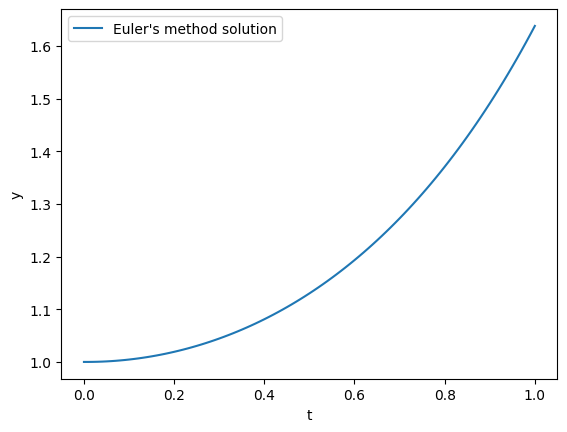

In [217]:
import matplotlib.pyplot as plt

def euler_list(h, t_beg, t_end, y0, a):
    t_values = [t_beg]
    y_values = [y0]

    t = t_beg
    while t < t_end:
        y0 = y0 + h*a(t)*y0
        t = t + h

        t_values.append(t)
        y_values.append(y0)

    return t_values, y_values

# Define the function a(t, y)
a = lambda t: t
def sol(t): return np.exp(t**2/2)

# Call the function with the parameters
t_values, y_values = euler_list(0.01, 0.0, 1.0, 1.0, a)
print(euler(0.001, 0.0, 1.0, 1.0, a)-sol(1))

# Plot the result
plt.plot(t_values, y_values, label="Euler's method solution")
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

In [642]:
tt = [0]
yy = [1]
# this doesnt work as the approx depends on the path and shoud be stationary
def solve_split(y0,h,lam,t_end,a):
    t = 0 
    def a_cnst(x) : return a(t)
    p = lam*h/(lam*h+1) 
    if random()<p:
        t_new = t + np.random.exponential(lam*h**2)
        def a_adj(x): return (a(x)-(1-p)*a_cnst(x))/p  
        if t_new>t_end: return euler(h**2.5/100,t,t_end,y0,a_adj)
        y0 = euler(h**2.5/10,t,t_new,y0,a_adj)
        def a_cnst(x) : return a(t_new)
        t = t_new
        tt.append(t)
        yy.append(y0)


    while True:
        t_new = t + np.random.exponential(h)
        if t_new>t_end: 
            return euler(h**1.5/100,t,t_end,y0,a_cnst)
        y0 = euler(h**1.5/10,t,t_new,y0,a_cnst)
        t = t_new
        tt.append(t)
        yy.append(y0)

        t_new = t + np.random.exponential(lam*h**2)
        def a_adj(x): return (a(x)-(1-p)*a_cnst(x))/p  
        if t_new>t_end: return euler(h**2.5/100,t,t_end,y0,a_adj)
        y0 = euler(h**2.5/10,t,t_new,y0,a_adj)
        def a_cnst(x) : return a(t_new)
        t = t_new
        tt.append(t)
        yy.append(y0)



1.7671177960311009
[0, 0.13056580545486016, 0.13464124169710112, 0.2521720452370756, 0.25306746854293616, 0.267498452936431, 0.27102100221601283, 0.37125287335047896, 0.3723467601901794, 0.4755069015725863, 0.47840964937143887, 0.7536044166241955, 0.7537539886512207, 0.884997626938037, 0.8877994561723127, 0.911304233092009, 0.9126516976962185, 0.9907461431046477, 0.9910982152388076]
1.6487762262438221


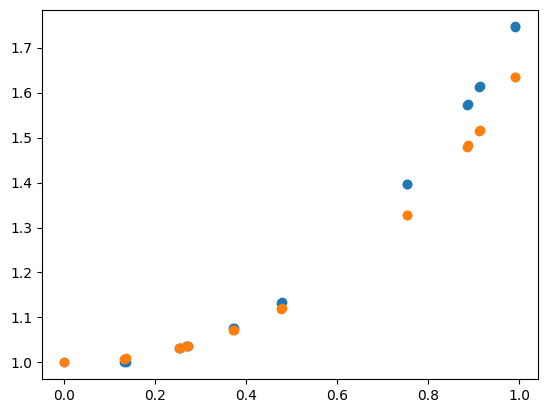

In [646]:
tt = [0]
yy = [1]
y0 = 1
print(solve_split(y0,0.1,0.2,1,a))
print(tt)
print(sol(1))
plt.scatter(tt,yy)
plt.scatter(tt, [sol(t) for t in tt])
plt.show()

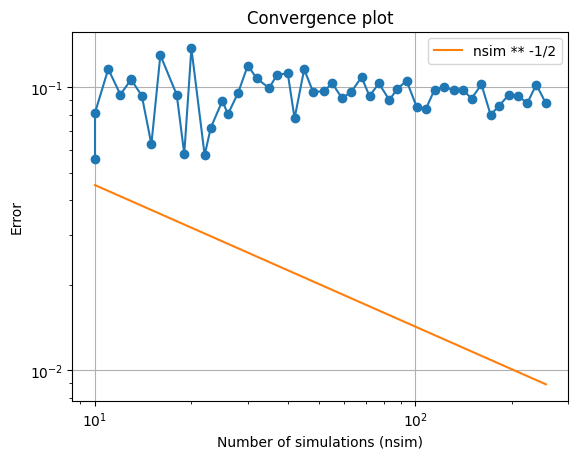

In [566]:
import matplotlib.pyplot as plt
import numpy as np

y0  =1
def a(t): return t
def sol(t): return euler(0.0001,0,t,y0,a)

nsim_values = np.logspace(1, np.log10(256), num=50).astype(int)


# Initialize an array to store the errors
errors = np.zeros(len(nsim_values))
np.random.seed(0)
# Calculate the error for each value of nsim
for i, nsim in enumerate(nsim_values):
    errors[i] = abs(sum(solve_split(y0,0.1,0.2,1,a)-sol(1) for _ in range(nsim))/nsim)

# Plot the errors
plt.loglog(nsim_values, errors, 'o-')

# Calculate the nsim ** -1/2 line
nsim_sqrt_inv = [1 / np.sqrt(nsim) for nsim in nsim_values]

# Plot the nsim ** -1/2 line
plt.loglog(nsim_values, np.array(nsim_sqrt_inv)/7, label='nsim ** -1/2')
plt.xlabel('Number of simulations (nsim)')
plt.ylabel('Error')
plt.title('Convergence plot')
plt.grid(True)

# Add a legend
plt.legend()
plt.show()


[0.001      0.00143845 0.00206914 0.00297635 0.00428133 0.00615848
 0.00885867 0.01274275 0.01832981 0.02636651 0.0379269  0.05455595
 0.078476   0.11288379 0.16237767 0.23357215 0.33598183 0.48329302
 0.6951928  1.        ]


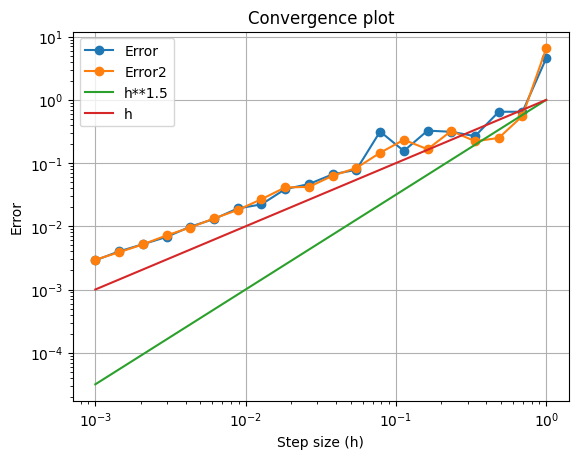

In [647]:
import matplotlib.pyplot as plt
import numpy as np


y0  =1
def a(t): return t
def sol(t): return np.exp(t**2/2)
lam = 0.2
t_end = 1

# Define the values of h to use
h_values = np.logspace(-3, 0, num=20)
print(h_values)

# Initialize an array to store the errors
errors = np.zeros(len(h_values))

h_pwr_1_5 = [h ** 1.5 for h in h_values]
h_pwr_1 = [h  for h in h_values]

# Calculate the error for each value of h
for i, h in enumerate(h_values):
    errors[i] = abs(solve_split(y0, h, lam, t_end, a) - sol(t_end))

# Plot the errors
plt.loglog(h_values, errors, 'o-', label='Error')

# Calculate the error for each value of h
for i, h in enumerate(h_values):
    errors[i] = abs(solve_split(y0, h, lam, t_end, a) - sol(t_end))

# Plot the errors
plt.loglog(h_values, errors, 'o-', label='Error2')

# Plot the h**1.5 line
plt.loglog(h_values, h_pwr_1_5, label='h**1.5')
plt.loglog(h_values, h_pwr_1, label='h')

plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.title('Convergence plot')
plt.grid(True)
plt.legend()
plt.show()

# test the splitting with analytical subsolutions 2

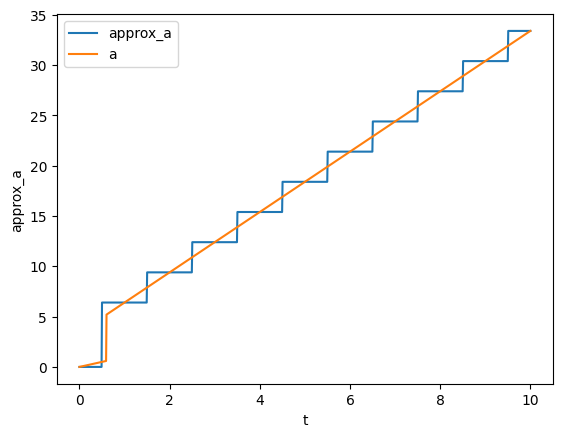

In [668]:
import numpy as np
import matplotlib.pyplot as plt

a = lambda t: t if t < 0.6 else 3*t+3.4
def approx_a(t,h):
    return a(h*np.floor(t/h + h/2))

# Define the values of t to use
t_values = np.linspace(0, 10, num=1000)
# Define the value of h to use
h = 1

# Calculate approx_a for each t
approx_a_values = [approx_a(t, h) for t in t_values]
aa = [a(t) for t in t_values]

# Plot approx_a
plt.plot(t_values, approx_a_values, label='approx_a')
plt.plot(t_values, aa, label='a')
plt.xlabel('t')
plt.ylabel('approx_a')
plt.legend()
plt.show()